**Modules**

In [ ]:
!pip install -q kaggle

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from google.colab import files
import random
import os
import cv2
import warnings

In [ ]:
# Import the Kaggle API Json File
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"luqmaanali","key":"245d16188507ec4330b4045f3c842d87"}'}

In [ ]:
!mkdir ~/.kaggle # Create the Folder of Kaggle
!cp kaggle.json ~/.kaggle/ # copy kaggle.json file into kaggle folder
!chmod 600 ~/.kaggle/kaggle.json # Permision of Json to act

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d andrewmvd/ocular-disease-recognition-odir5k # Import Dataset from the Kaggle
! unzip /content/ocular-disease-recognition-odir5k.zip # Unzip the All Dataset from the Kaggle

Streaming output truncated to the last 5000 lines.
  inflating: preprocessed_images/2179_left.jpg  
  inflating: preprocessed_images/2179_right.jpg  
  inflating: preprocessed_images/217_left.jpg  
  inflating: preprocessed_images/217_right.jpg  
  inflating: preprocessed_images/2180_left.jpg  
  inflating: preprocessed_images/2180_right.jpg  
  inflating: preprocessed_images/2181_left.jpg  
  inflating: preprocessed_images/2181_right.jpg  
  inflating: preprocessed_images/2182_left.jpg  
  inflating: preprocessed_images/2182_right.jpg  
  inflating: preprocessed_images/2183_left.jpg  
  inflating: preprocessed_images/2183_right.jpg  
  inflating: preprocessed_images/2184_left.jpg  
  inflating: preprocessed_images/2184_right.jpg  
  inflating: preprocessed_images/2185_left.jpg  
  inflating: preprocessed_images/2185_right.jpg  
  inflating: preprocessed_images/2187_left.jpg  
  inflating: preprocessed_images/2187_right.jpg  
  inflating: preprocessed_images/2189_left.jpg  
  inflating

**Dataset (CSV) File Information**

In [ ]:
# Get the Dataset CSV File
df = pd.read_csv("/content/full_df.csv")

# Display the Data from the DF
df.sample(3)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
5780,3985,48,Female,3985_left.jpg,3985_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",3985_left.jpg
5527,3223,56,Male,3223_left.jpg,3223_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",3223_left.jpg
746,864,71,Female,864_left.jpg,864_right.jpg,proliferative diabetic retinopathy,severe nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",864_right.jpg


In [ ]:
# Display the All Columns of the DataFrame
print(df.columns)

Index(['ID', 'Patient Age', 'Patient Sex', 'Left-Fundus', 'Right-Fundus',
       'Left-Diagnostic Keywords', 'Right-Diagnostic Keywords', 'N', 'D', 'G',
       'C', 'A', 'H', 'M', 'O', 'filepath', 'labels', 'target', 'filename'],
      dtype='object')


In [ ]:
# Display the Shape of the DataFrame
print("Shape of DataFrame : " , df.shape)

Shape of DataFrame :  (6392, 19)


In [ ]:
# Check the Nan Values in the DataFrame
missData = df.isnull().sum()

In [ ]:
# Check the How many Data is Missing
print(missData)

ID                           0
Patient Age                  0
Patient Sex                  0
Left-Fundus                  0
Right-Fundus                 0
Left-Diagnostic Keywords     0
Right-Diagnostic Keywords    0
N                            0
D                            0
G                            0
C                            0
A                            0
H                            0
M                            0
O                            0
filepath                     0
labels                       0
target                       0
filename                     0
dtype: int64


### **Classification Problem (Multi-Class)**

In [ ]:
# Name of Each Class Labels
def nameLabel(index):

  # Define the Name of the Labels
  nameLabel = ["Normal" , "Diabetes" , "Glaucoma" , "Cataract" , "Cataract" , "Age Issue" , "Hypertension" , "Myopia" , "Other"]

  # Return the Label with the help of the Index
  return nameLabel[index]


# Define the Directory of the Dataframe Images
ImageDir = "/content/preprocessed_images"

**Getting the Images and Store in the Numpy Array**

In [ ]:
# Now Load the Images and Labels in the List
Images = []
Labels = []

for i in range(0,len(df),2):

  # Get the Path of the Left and Right Fundus Images
  path_left_eye  = os.path.join(ImageDir, df.loc[i, "Left-Fundus"])
  path_right_eye = os.path.join(ImageDir, df.loc[i, "Right-Fundus"])

  # Now Read the Images and Resize in the (120,120,3) Shape
  try:
    left_image = cv2.imread(path_left_eye)
    left_image = cv2.resize(left_image, (120, 120))

    right_image = cv2.imread(path_right_eye)
    right_image = cv2.resize(right_image, (120, 120))
  except:
    continue

  # Append the Images and Labels in the List
  Images.append((left_image, right_image))
  Labels.append(np.argmax(df.loc[i, ['N', 'D', 'G','C', 'A', 'H', 'M', 'O']].values))

In [ ]:
# Now Check the Shape of Images and Labels
print("Shape of Images" , np.shape(Images))
print("Shape of Label" , np.shape(Labels))


# Convert the Images & Label into Numpy Array
Images = np.array(Images)
Labels = np.array(Labels)

# Display the Shape
print("Shape Numpy Images" , Images.shape)
print("Shape Numpy Labels" , Labels.shape)

Shape of Images (3041, 2, 120, 120, 3)
Shape of Label (3041,)
Shape Numpy Images (3041, 2, 120, 120, 3)
Shape Numpy Labels (3041,)


**Concatenate the Left & Right Image**

In [ ]:
# Convert the Images and Labels into Numpy Array
Images = X = np.array([np.concatenate((left_image.flatten(), right_image.flatten())) for left_image, right_image in Images])
Labels = np.array(Labels)

# Display the Shape of the Images & Labels
print(f"Here is the Shape of the Images : {Images.shape}")
print(f"Here is the Shape of the Labels : {Labels.shape}")

Here is the Shape of the Images : (3041, 86400)
Here is the Shape of the Labels : (3041,)


**Dividing the DataFrame into Train & Test**

In [ ]:
# Dividing the DataFrame Images into Training & Testing
Xtrain , Xtest , Ytrain , Ytest = train_test_split(Images , Labels , test_size = 0.2 , random_state = 42)

# Display the Shape of the Training and Testing
print(f"Here is the Shape of the X Train : {Xtrain.shape}")
print(f"Here is the Shape of the Y Train : {Ytrain.shape}")
print(f"Here is the Shape of the X Test  : {Xtest.shape}")
print(f"Here is the Shape of the Y Test : {Ytest.shape}")

Here is the Shape of the X Train : (2432, 86400)
Here is the Shape of the Y Train : (2432,)
Here is the Shape of the X Test  : (609, 86400)
Here is the Shape of the Y Test : (609,)


**Visualization Training Images**

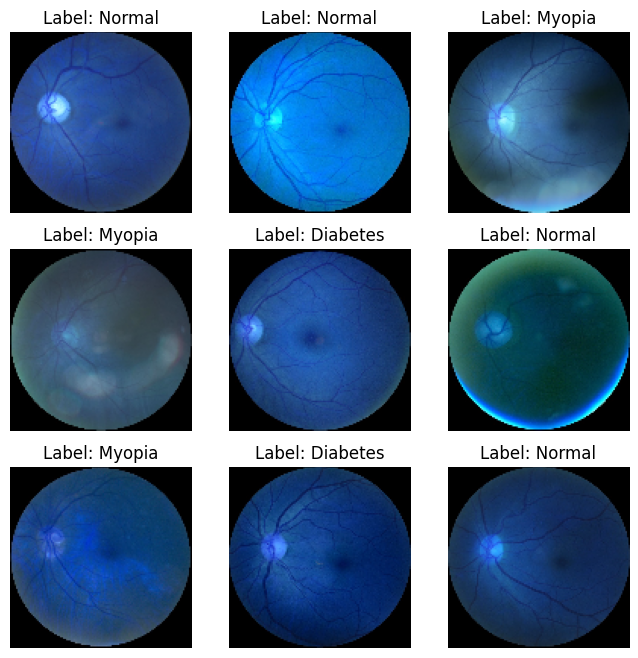

In [ ]:
# Reshape the flattened images back to (2, 120, 120, 3) assuming original shape was (150, 150, 3)
reshaped_images = Xtrain.reshape((-1, 2, 120, 120, 3))

# Display 3x3 grid of images with labels
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

for i in range(3):
    for j in range(3):
        index = i * 3 + j
        # Display the image
        axes[i, j].imshow(reshaped_images[index, 0])
        axes[i, j].set_title(f"Label: {nameLabel(Ytrain[index])}")
        axes[i, j].axis('off')

plt.show()

**Visualization Testing Images**

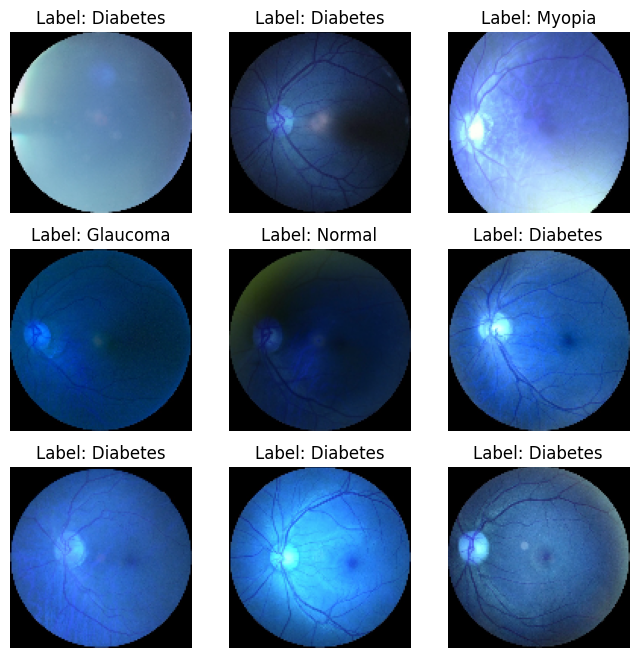

In [ ]:
# Reshape the flattened images back to (2, 120, 120, 3) assuming original shape was (150, 150, 3)
reshaped_images = Xtest.reshape((-1, 2, 120, 120, 3))

# Display 3x3 grid of images with labels
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

for i in range(3):
    for j in range(3):
        index = i * 3 + j
        # Display the image
        axes[i, j].imshow(reshaped_images[index, 0])
        axes[i, j].set_title(f"Label: {nameLabel(Ytest[index])}")
        axes[i, j].axis('off')

plt.show()

**Machine Learning Support Vector Machine Model**

In [ ]:
# Create the Object of Support Vector Classifier
svcModel = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42)

# Now fit the Model in the Training Dataset
svcModel.fit(Xtrain , Ytrain)

SVC(random_state=42)

In [ ]:
# Now Predict the Model in the Testing Dataset
y_pred = svcModel.predict(Xtest)

# Calculate the Accuracy of the Model in the Testing Dataset
accuracy = accuracy_score(Ytest, y_pred)

# Display the Accuracy of the Model
print("Accuracy:", accuracy)

Accuracy: 0.4039408866995074


In [ ]:
# Calculate & Display the Classification Report
print(classification_report(Ytest, y_pred))

              precision    recall  f1-score   support

           0       0.37      0.60      0.45       184
           1       0.42      0.60      0.50       210
           2       0.00      0.00      0.00        30
           3       0.67      0.07      0.12        30
           4       0.00      0.00      0.00        36
           5       0.00      0.00      0.00         8
           6       1.00      0.30      0.46        27
           7       0.00      0.00      0.00        84

    accuracy                           0.40       609
   macro avg       0.31      0.20      0.19       609
weighted avg       0.33      0.40      0.33       609



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


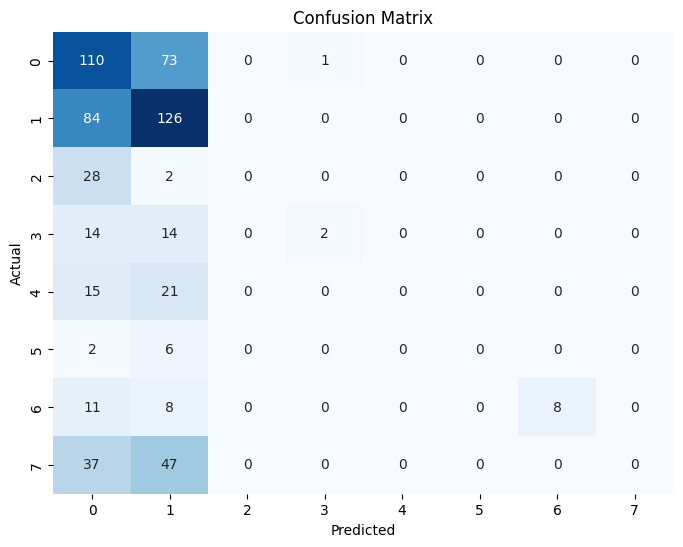

In [ ]:
# Display the confusion matrix
cm = confusion_matrix(Ytest, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()